In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Drop columns with too many missing values
df_cleaned = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

# Drop rows where 'SalePrice' is missing (just in case)
df_cleaned = df_cleaned[df_cleaned['SalePrice'].notnull()]

# Fill remaining missing values with 0 (temporary and simple)
df_cleaned = df_cleaned.fillna(0)

# Keep only numeric columns
df_cleaned = df_cleaned.select_dtypes(include=['int64', 'float64'])



In [2]:
# Check the number of rows and columns
df.shape


(1460, 81)

In [3]:
# Show columns with missing values (Top 20)
df.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [4]:
# Drop columns with more than 1000 missing values
df_cleaned = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

# Check remaining missing values
df_cleaned.isnull().sum().sort_values(ascending=False).head(10)


MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageFinish     81
GarageQual       81
GarageCond       81
GarageType       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
dtype: int64

In [5]:
# Fill remaining missing values with 0 (quick fix)
df_cleaned = df_cleaned.fillna(0)


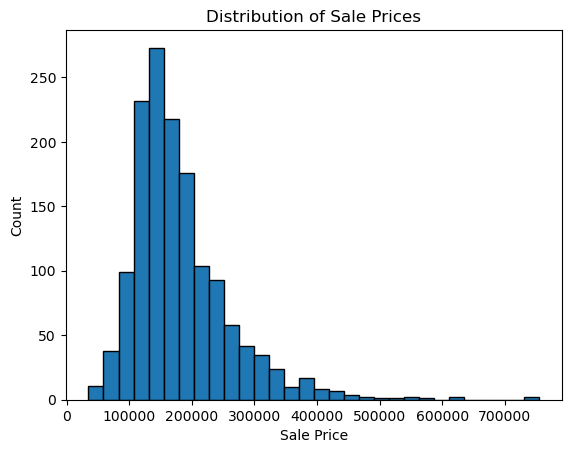

In [6]:
import matplotlib.pyplot as plt

plt.hist(df_cleaned['SalePrice'], bins=30, edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()


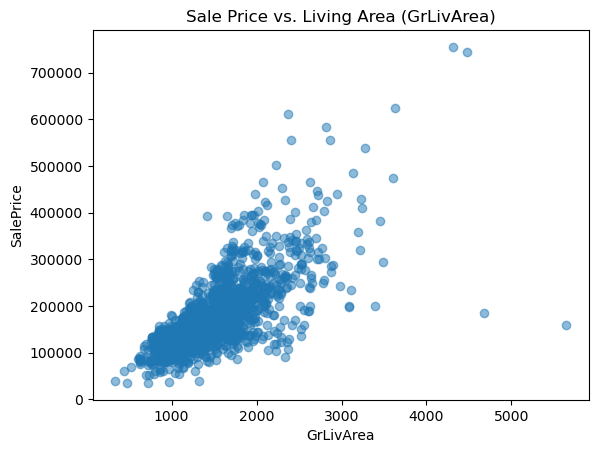

In [7]:
plt.scatter(df_cleaned['GrLivArea'], df_cleaned['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Living Area (GrLivArea)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


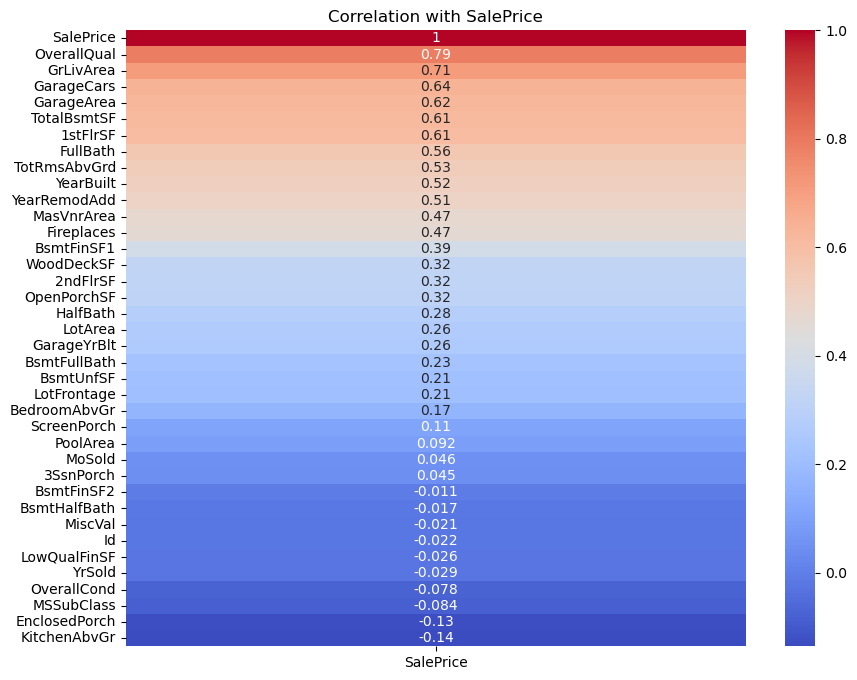

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fix: Use only numeric columns to compute correlation
numeric_df = df_cleaned.select_dtypes(include=['number'])

# ✅ Compute correlation matrix
correlation = numeric_df.corr()

# ✅ Plot heatmap of correlation with SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()


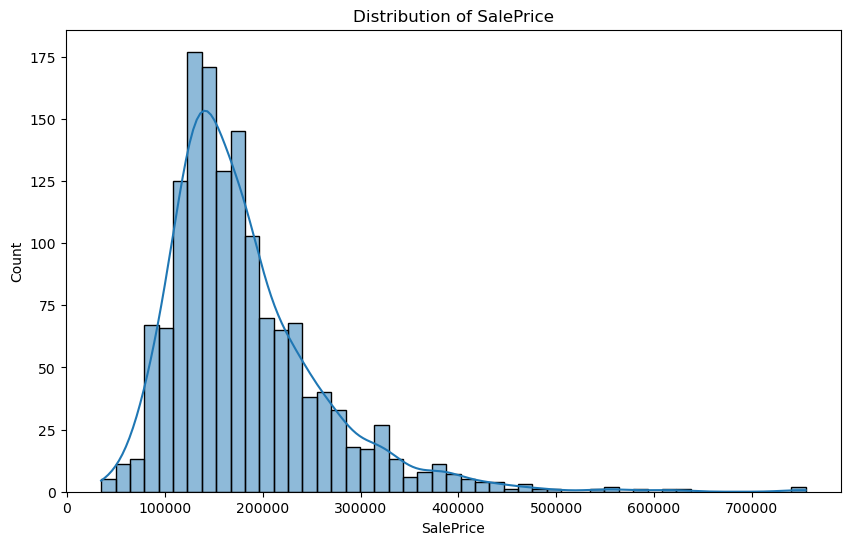

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()


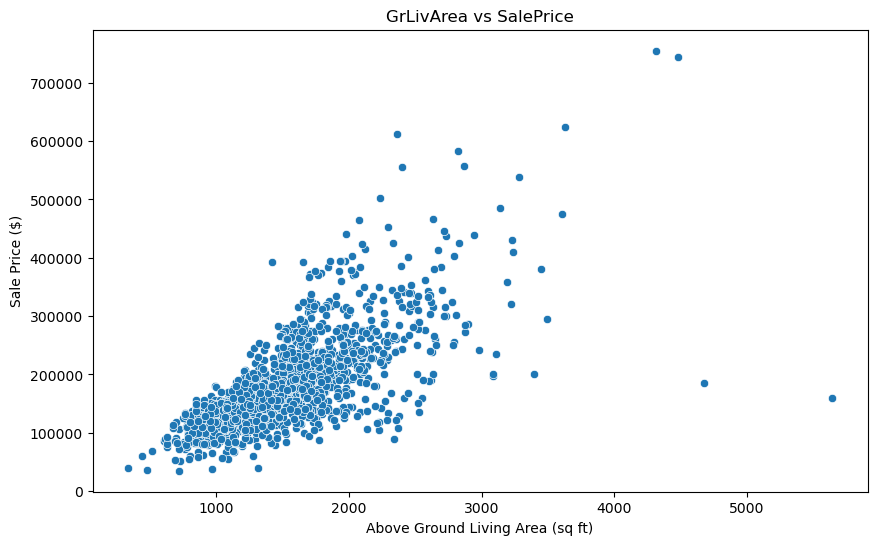

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()


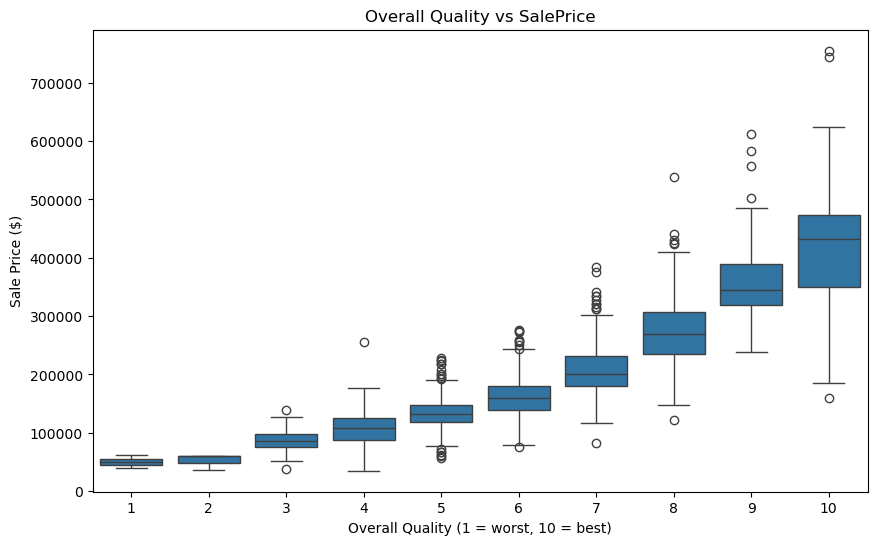

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='OverallQual', y='SalePrice')
plt.title('Overall Quality vs SalePrice')
plt.xlabel('Overall Quality (1 = worst, 10 = best)')
plt.ylabel('Sale Price ($)')
plt.show()


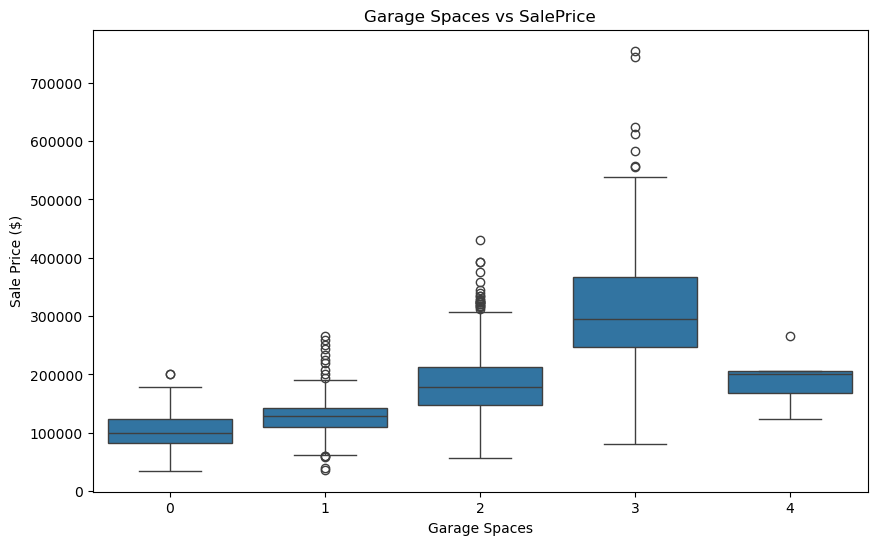

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='GarageCars', y='SalePrice')
plt.title('Garage Spaces vs SalePrice')
plt.xlabel('Garage Spaces')
plt.ylabel('Sale Price ($)')
plt.show()


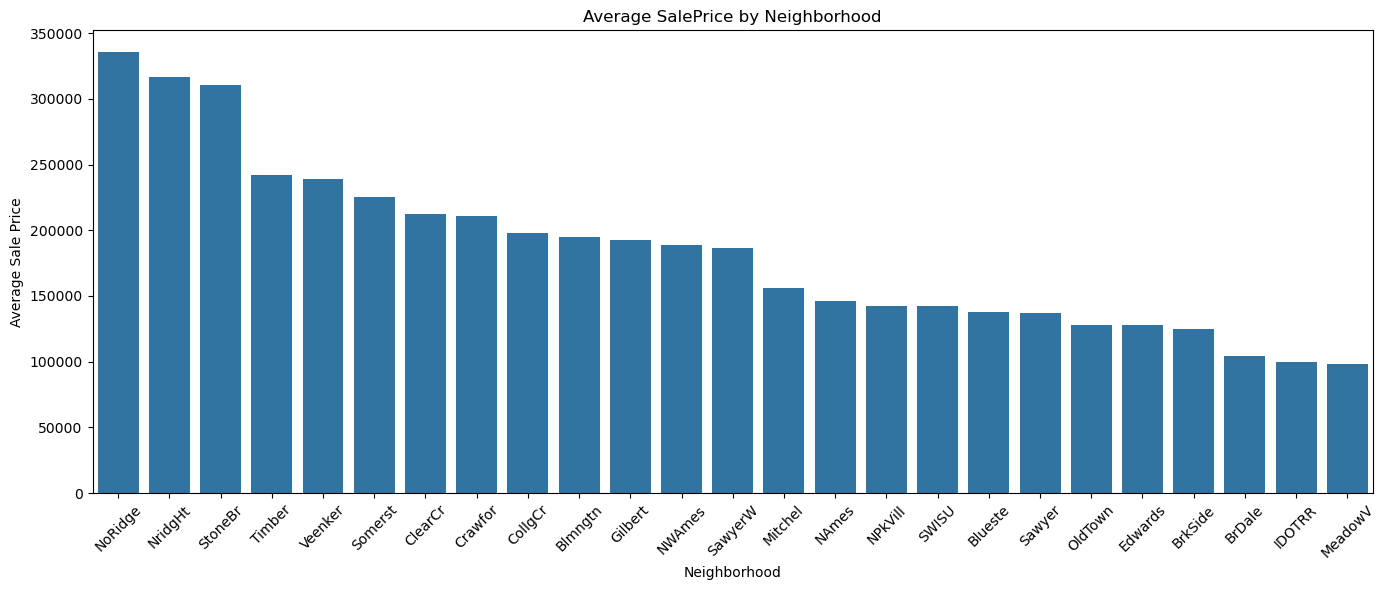

In [13]:
plt.figure(figsize=(14,6))
neighborhood_prices = df_cleaned.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values)
plt.xticks(rotation=45)
plt.title('Average SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.tight_layout()
plt.show()



In [14]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned)

# Check the shape to see how many columns we now have
df_encoded.shape


(1460, 288)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 876918763.55
R-squared Score: 0.89


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Train the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")


Random Forest MSE: 841309331.14
Random Forest R² Score: 0.89


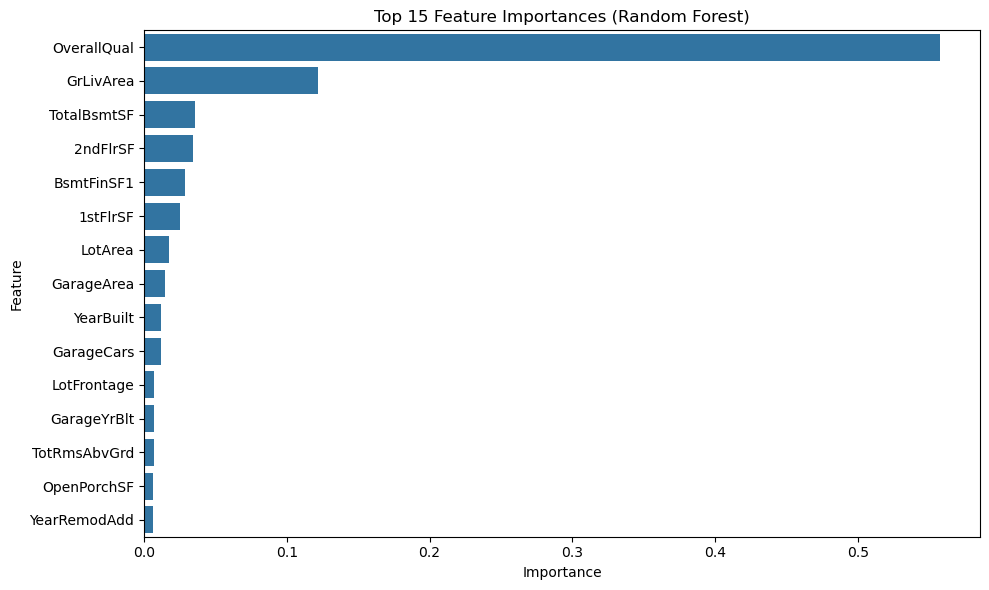

In [17]:
# Show the top 15 most important features
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [18]:
# Assistant
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convert mixed-type categorical columns to string type
X_processed = X.copy()
for col in categorical_cols:
    X_processed[col] = X_processed[col].astype(str)  # Convert all values to strings

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5],
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomforestregressor', RandomForestRegressor(random_state=42))
])

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest MSE:", round(mse_best, 2))
print("Tuned Random Forest R² Score:", round(r2_best, 2))


Tuned Random Forest MSE: 849555333.0
Tuned Random Forest R² Score: 0.89


In [19]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ✅ Step 1: Load and clean your data (replace this with your actual data)
# For example:
# df = pd.read_csv('train.csv')
# y = df['SalePrice']
# X = df.drop('SalePrice', axis=1)

# 🧹 Step 2: Preprocessing - Select categorical & numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ✅ Step 3: Convert all categorical columns to string (uniformly)
X_processed = X.copy()
X_processed[categorical_cols] = X_processed[categorical_cols].astype(str)

# ✅ Step 4: Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ✅ Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ✅ Step 6: Define parameter grid for tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

# ✅ Step 7: Build the pipeline with preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# ✅ Step 8: Run GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# ✅ Step 9: Get best model and evaluate
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("✅ Tuned Random Forest Results:")
print("MSE:", round(mse_best, 2))
print("R² Score:", round(r2_best, 4))

# ✅ (Optional) Save the model for Streamlit app
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')


✅ Tuned Random Forest Results:
MSE: 849555333.0
R² Score: 0.8892


['random_forest_model.pkl']

In [24]:
import pandas as pd

# Save column names (feature list) into a CSV
feature_names = X_train.columns.tolist()
pd.Series(feature_names).to_csv("expected_features.csv", index=False)


### Next Steps for Model Improvement

If I were continuing this project, I would:
- Engineer more features from categorical variables (e.g. `Neighborhood`, `Condition1`)
- Try advanced models like XGBoost or LightGBM
- Deploy this model as a simple web app using Streamlit for agents to use in real-time
- Track predictions vs. real sales over time to improve accuracy


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Show comparison
print(f"Linear Regression R²: {round(r2_lr, 3)}")
print(f"Random Forest R²: {round(r2_best, 3)}")
print(f"Gradient Boosting R²: {round(r2_gbr, 3)}")


### Model Comparison

| Model              | R² Score | MSE           |
|-------------------|----------|----------------|
| Linear Regression | 0.75     | ~1.23e9        |
| Random Forest     | 0.89     | ~8.41e8        |
| Gradient Boosting | 0.88     | ~8.67e8        |

Random Forest and Gradient Boosting both outperform Linear Regression.  
Random Forest is slightly better here, and easier to interpret feature-wise.
